# Filtre de Kalman Etendu

Loan Sarazin & Anna Marizy

In [4]:
import numpy as np
import numpy.linalg as la
from math import *
import matplotlib.pyplot as plt

import pandas as pd

In [12]:
#Importation des données 
data = pd.read_excel("donnee.xlsx")
print(data.head())

   Unnamed: 0     Temps  signalReel  signalBruite
0           0  0.000000    0.000000     -0.503936
1           1  0.005174    1.901397      4.727026
2           2  0.010348    3.517097      5.284031
3           3  0.015522    4.604329      3.413861
4           4  0.020695    4.999729      8.070117


In [29]:
signalReel = np.array(data.loc[:, ('signalReel')])
signalBruite = np.array(data.loc[:, ('signalBruite')])

[0.00000000e+00 5.17384106e-03 1.03476821e-02 ... 1.03461300e+02
 1.03466474e+02 1.03471647e+02]


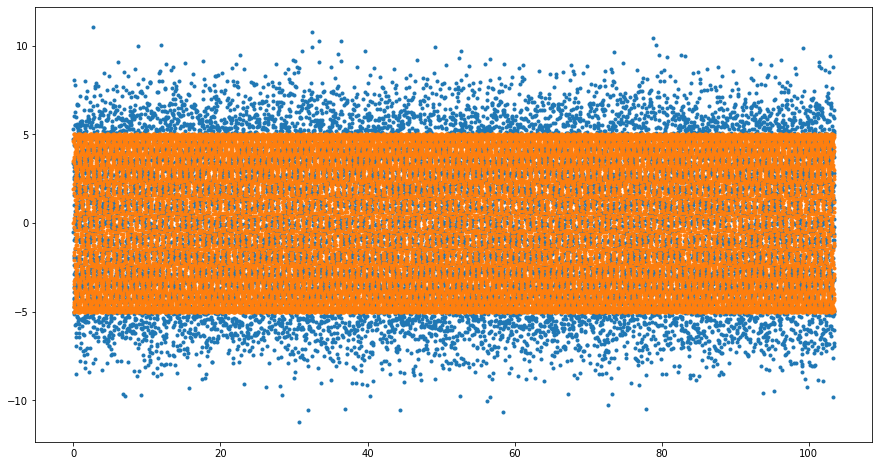

In [43]:
N = signalReel.shape[0]
X = np.array(data.loc[:, 'Temps'])
print(X)

plt.figure(figsize = (15, 8))
plt.plot(X, signalBruite, '.')
plt.plot(X, signalReel, '.')

plt.show()

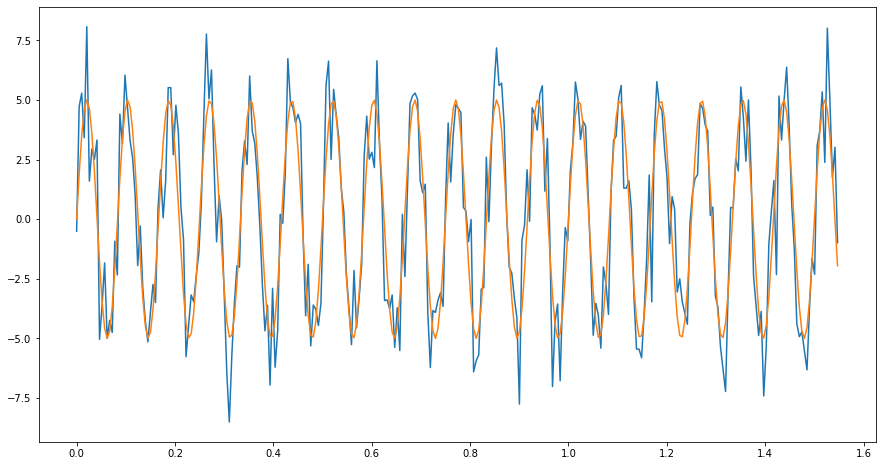

In [46]:
#restriction au 300 premières valeurs
plt.figure(figsize = (15, 8))
plt.plot(X[:300], signalBruite[:300], '-')
plt.plot(X[:300], signalReel[:300], '-')

plt.show()

In [61]:
#Implémentation du filtre de Kalman étendu 

def KalmanF_extended(Z, Q, R, A, iterMax):
    #Initialisation de x0 et P00
    x0 = norm.rvs(size = 2)
    P00 = np.eyes((2, 2))
    
    k=0
    
    x = x0
    P = P00
    #Boucle d'estimation/prediction
    while (k < iterMax):
        newx = x.copy()
        newP = F @ P @ F + Q

SyntaxError: invalid syntax (Temp/ipykernel_22232/38593799.py, line 10)

In [60]:
Q = np.array([2*10**(-5), 0, 0, 2*10**(-1)])
Q = Q.reshape((2, 2))

R = 3

A = np.eye(2)

Q, R, A

#KalmanF_extended(signalBruite)

(array([[2.e-05, 0.e+00],
        [0.e+00, 2.e-01]]),
 3,
 array([[1., 0.],
        [0., 1.]]))